## TITANIC SURVIVORS

El problema de inicio, que hacen la mayoría de personas, al área de Ciencia de Datos o Data Science es el Titanic.
Lo que se busca solucionar con este problema es predecir a través de ciertas características que se entregan(input), si una persona sobrevivió a la catástrofe ocurrida.
Cómo es un hecho ocurrido, se puede trabajar para que el modelo prediga al 100%, es decir para que memorize patrones, sin embargo lo que yo busco, es que el modelo que elabore, pueda generalizar, es por ello que con un 85% a menos de 95%, estaría contento, porque es mi primer proyecto que pienso terminarlo.
Respecto a la data, cuento con dos conjuntos de datos, train.csv con el que entrenaré a la data, y test.csv del cual mi modelo predecirá si la persona sobrevivió o no.

Importemos las librerias que utilizaremos para transformar la data y encontrar patrones

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%load_ext nb_black
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>

Carguemos los archivos csv que contienen la información

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

<IPython.core.display.Javascript object>

Veamos si tienen la misma cantidad de columnas

In [3]:
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


<IPython.core.display.Javascript object>

Era de suponerse que uno de los dataset no tuviera el Target, pues es del cual vamos a predecir la supervivencia.

Es hora de saber la cantidad de filas y columnas que tienen nuestros datasets.

In [4]:
# Guardo la cantidad de filas que tiene el dataset train
print(train.shape)
end_train, _ = train.shape

(891, 12)


<IPython.core.display.Javascript object>

In [5]:
test.shape

(418, 11)

<IPython.core.display.Javascript object>

Como ambos dataset contienen las mismas caracteristicas a excepción del target, juntemos ambos.

La razón para juntarlos, es para aplicar las mismas operaciones para que cuando se prediga, tengan las mismas condiciones.

In [6]:
titanic = pd.concat((train, test))
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<IPython.core.display.Javascript object>

Veamos más características de los datos

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


<IPython.core.display.Javascript object>

Concluimos que hay datos nulos, contamos con 12 columnas, tendremos que convertir las object a int, y las float e int, habrá que ver si las convertimos a grupos y luego otra vez a números. 

Informémonos de cuales son las columnas con datos núlos

In [8]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<IPython.core.display.Javascript object>

Debemos de tomar en cuenta que los nulos de Survived, se deben a haber combinado los dataset, así que debemos de pasarlo por alto.
Sin embargo,  debemos de rellenar los espacios faltantes de **Age**,**Fare** y **Ticket**. 
Por otro lado **Cabin** es una potencial característica a ser descartada por la cantidad de vacios con la que cuenta, podría añadirle ruido a nuestro modelo, entendamos mejor a esta variable.

Verifiquemos la cantidad de nulos en el dataset Train    

In [9]:
train["Cabin"].isnull().sum()

687

<IPython.core.display.Javascript object>

Al ser 687 de 891 los datos nulos, podemos darnos cuenta que será muy dificil de rescatar esta variable. Será mejor no utilizarla para nuestro modelo.

In [10]:
# Eliminando la característica Cabin para el análisis de nuestro modelo
del titanic["Cabin"]

<IPython.core.display.Javascript object>

Antes de limpiar las variables, conozcamos un poco más de estas.

## Análisis de variable object

In [11]:
# Análisis de las variables Object
object_ = ["Name", "Sex", "Ticket", "Embarked"]
train[object_].describe()

,Name,Sex,Ticket,Embarked
count,891,891,891,889
unique,891,2,681,3
top,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",male,347082,S
freq,1,577,7,644


<IPython.core.display.Javascript object>

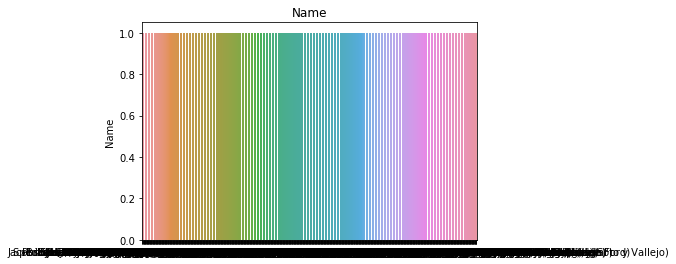

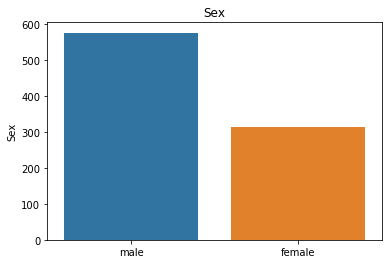

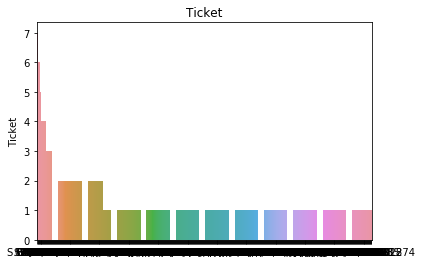

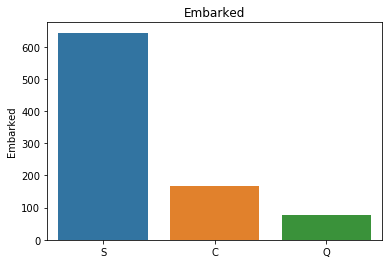

<IPython.core.display.Javascript object>

In [12]:
# Análisis de las variables Object desde un punto de vista gráfico
for i in object_:
    sns.barplot(train[i].value_counts().index, train[i].value_counts()).set_title(i)
    plt.show()

- **Name** que es el nombre se supone que debe de ser único, se debería de repetir una sola vez, sin embargo hay dos nombres que se repiten, verificaremos este punto. Además por ser un valor único para cada tripulante, no influirá en el modelo, podríamos descartarla a menos que tenga alguna característica que pueda extraerla.
- **Sex** es una variable que contiene dos categorías y la mayor cantidad de tripulantes son hombres.
- **Ticket** es una variable alfanumérica, debemos de ver su sintaxis para ver si podemos cambiarla a solo números, o si utilizamos la parte numérica.
- **Embarked** es una variable que tiene tres categorías, donde la categoría "*S*" se repite mucho más que las otras.

## Análisis de variables numeric

In [13]:
# Análisis de las variables Numéricas
titanic.describe(include=[np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<IPython.core.display.Javascript object>

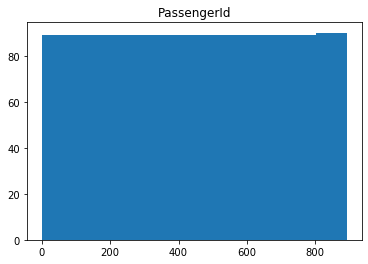

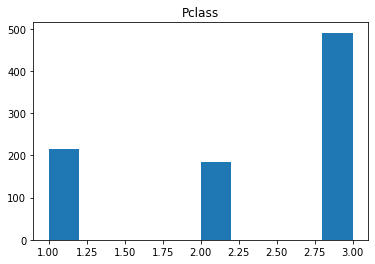

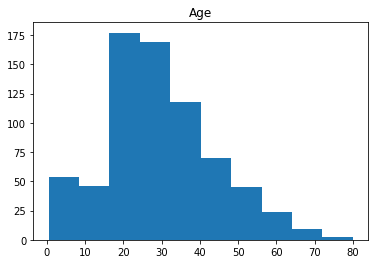

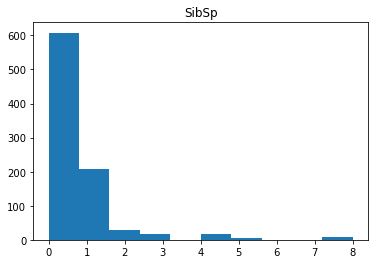

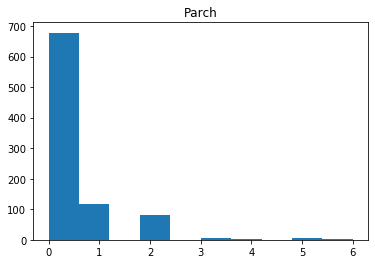

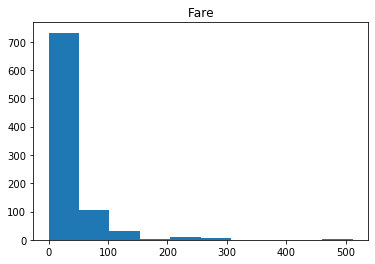

<IPython.core.display.Javascript object>

In [14]:
# Veamos la observaciones anteriores
number_ = ["PassengerId", "Pclass", "Age", "SibSp", "Parch", "Fare"]
for i in number_:
    plt.hist(train[i])
    plt.title(i)
    plt.show()

In [15]:
pd.pivot_table(train, index="Survived", values=number_)

,Age,Fare,Parch,PassengerId,Pclass,SibSp
Survived,,,,,,
0,30.626179,22.117887,0.329690,447.016393,2.531876,0.553734
1,28.343690,48.395408,0.464912,444.368421,1.950292,0.473684


<IPython.core.display.Javascript object>

- **Passengerld** si bien es una variable númerica, es única, la descartaremos.
- Notamos en **Pclass** que tiene tres categorías, que son muy pocos los que pertenecen a la categoría 1, y gran cantidad de personas a la categoría 3(más del 50%).
- El promedio de la edad de los tripulantes es de 30 años aprox. , hubieron personas recien nacidas, hasta los 80 años, y la gran mayoría tenía menos de 50 y más de 20 años.
- Respecto al número de hermanos y/o conyugés en la tripulación(**SibSp**), podemos notar que la gran mayoría no tenía(más de 50%) y hay excepciones donde podemos encontrar hasta 8 hermanos y/o conyugés.
- **Parch**, que es el número de padres e/o hijos en la tripulación, es parecido **SibSp**, pues la gran mayotía (más del 75%) no cuenta con estos familiares, claro podemos encontrar personas que cuentan con un máximo de 9 familires.                          Quizá podriamos juntar estas dos características para simplificar el modelo.
- Finalmente la **Fare** o tarifa es una característica continua, tiene un solo valor faltante, podemos rellenarlo con la media, el promedio es 33(no se conoce la unidad monetaria). Lo máximo que se pagó es 512 y hubieron algunos que no pagaron nada, el 50% de los tripulantes pagó por debajo de los 15. 

## Análisis de relación entre variables y target

Analicemos la relación de Sex con Survived

In [16]:
train[["Sex", "Survived"]].groupby("Sex", as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


<IPython.core.display.Javascript object>

- Las mujeres fueron las que más sobrevivieron y con la información anterior sabemos que eran la minoría. 
- Los hombres fueron los que menos sobrevivieron y eran los que más abundaban.

Podemos decir que si eras mujer tenías una gran posibilidad de sobrevivir.

Evaluemos la relación de Embarked con Survived

In [17]:
train[["Embarked", "Survived"]].groupby("Embarked", as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<IPython.core.display.Javascript object>

- La categoría C de Pclass es la que más sobrevivió, aunque era un número pequeño. 
- La categoría S de Pclass es la menos sobrevivió, era la que más cantidad de personas tenía.

Esto quiere decir que si pertenecías a la clase C tenías una gran probabilidad de sobrevivir en contraste con la categoría S, donde tenías una gran probabilidad de no sobrevivir.

Si bien la característica Ticket se ha agrupado como categórica, por lo analizado anteriormente podemos inferir que es numérica, y hay que ver que impacto tiene en las otras. La trabajaremos después, porque al ser tan dispersa no serviría mucho.

Veamos la relación entre SibSp y Parch con Survived.

In [18]:
# Relación de SibSp con Survived
train[["SibSp", "Survived"]].groupby("SibSp", as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<IPython.core.display.Javascript object>

In [19]:
# Relación de Parch con Survived
train[["Parch", "Survived"]].groupby("Parch", as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


<IPython.core.display.Javascript object>

Consideramos que las podemos agrupar porque tratan de la misma naturaleza.

Analicemos la relación de Pclass con Survived

In [20]:
train[["Pclass", "Survived"]].groupby("Pclass", as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<IPython.core.display.Javascript object>

Los pertenecientes a la Clase 1 son los que más sobrevivieron, mientras que la clase 3, son los que menos sobrevivieron, parece similar a lo que sucedía con el **Embarked**, sería bueno cruzar información.

Veamos la correlación que tienen las variables numéricas.

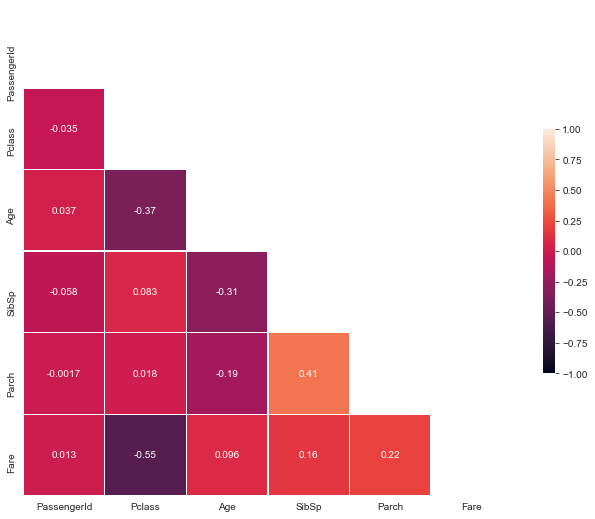

<IPython.core.display.Javascript object>

In [21]:
sns.set_style(style="white")

f, ax = plt.subplots(figsize=(11, 9))

mask = np.zeros_like(train[number_].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
    train[number_].corr(),
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    ax=ax,
    mask=mask,
    annot=True,
)

Notamos que las variables **Parch** y **SibSp** están correlacionadas positivamente, entonces ratificamos que podríamos juntar ambas variables.

Veamos algunas relaciones entre variables y "**Survived**" para poder rellenar espacios en blanco o simplemente ver si son importantes para el modelo.

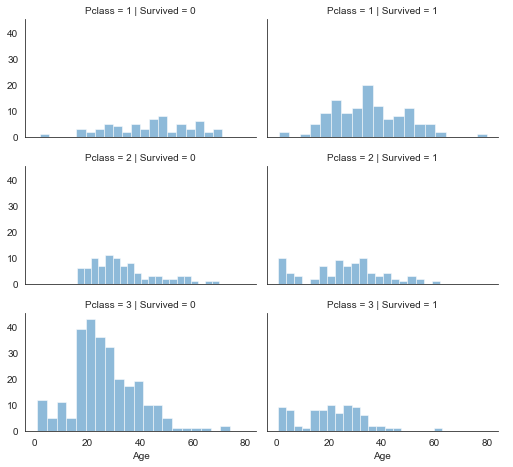

<IPython.core.display.Javascript object>

In [22]:
# Relación entre Pclass, Age y Survived
grid = sns.FacetGrid(train, col="Survived", row="Pclass", size=2.2, aspect=1.6)
grid.map(plt.hist, "Age", alpha=0.5, bins=20)
grid.add_legend()

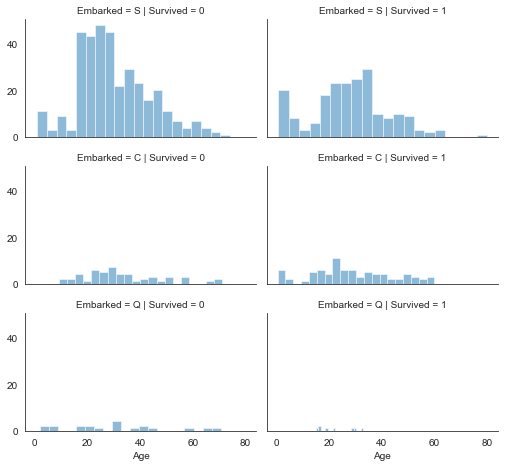

<IPython.core.display.Javascript object>

In [23]:
# Relación entre Embarked, Age y Survived
grid = sns.FacetGrid(train, col="Survived", row="Embarked", size=2.2, aspect=1.6)
grid.map(plt.hist, "Age", alpha=0.5, bins=20)
grid.add_legend()

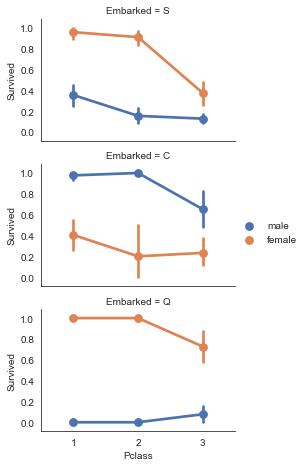

<IPython.core.display.Javascript object>

In [24]:
# Relación entre Embarked, Pclass, Sex y Survived
grid = sns.FacetGrid(train, row="Embarked", size=2.2, aspect=1.6)
grid.map(sns.pointplot, "Pclass", "Survived", "Sex", palette="deep")
grid.add_legend()

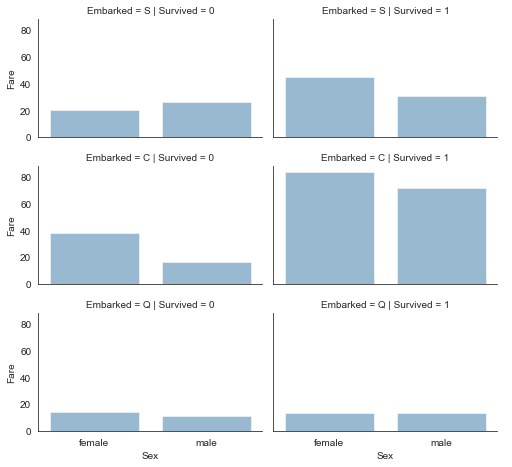

<IPython.core.display.Javascript object>

In [25]:
# Relación entre Embarked, Sex, Fare, Survived
grid = sns.FacetGrid(train, row="Embarked", col="Survived", size=2.2, aspect=1.6)
grid.map(sns.barplot, "Sex", "Fare", alpha=0.5, ci=None)
grid.add_legend()

- Podemos imputar los valores faltantes de **Age** por medio de la variable **PClass**.
- Para las variables **Fare** y **Embarked** simplemente podemos usar el promedio debido a la cantidad pequeña de datos faltantes.

## Transformando las variables

Verifiquemos cuales son los nombres que se repiten, y decidamos si eliminarlos o dejarlos para el análisis.

In [26]:
# Veamos los nombres repetidos
titanic.Name.value_counts().head(2).reset_index()

,index,Name
0,"Connolly, Miss. Kate",2
1,"Kelly, Mr. James",2


<IPython.core.display.Javascript object>

In [27]:
# Observemos el contexto de esos nombres
nom = ["Connolly, Miss. Kate", "Kelly, Mr. James"]
titanic[titanic.Name.isin(nom)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
289,290,1.0,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,Q
696,697,0.0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,S
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
6,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q


<IPython.core.display.Javascript object>

Los nombres se encuentran en diferentes datasets. Algunas de sus características varían, cómo posiblemente elimine los nombres, será mejor que los deje, pues no afectará al modelo.

Notamos que los nombres tienen un título que se usaba mucho en la época(Miss.,Mr.), quizá le sirva al modelo. 
Extraeremos esos títulos y veremos como se relacionan con el Survived. 

In [28]:
# Creamos una columna en el dataset Train que nos servirá para conocer la relación con Survived.
train["Titulo"] = train.Name.str.extract(" ([A-Za-z]+)\.", expand=False)
train[["Titulo", "Survived"]].groupby("Titulo").mean()

,Survived
Titulo,
Capt,0.000000
Col,0.500000
Countess,1.000000
Don,0.000000
Dr,0.428571
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.575000


<IPython.core.display.Javascript object>

Son muchos títulos y algunos tienen parecida relación, podemos agruparlos entre aquellos que tengan porcentajes similares

Veamos cuales de estos titulos se refieren a hombres y mujeres

In [29]:
pd.crosstab(train["Titulo"], train["Sex"])

Sex,female,male
Titulo,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


<IPython.core.display.Javascript object>

Juntemos algunos algunos que se refieren a lo mismo, y otros que son raros y tienen poco impacto en la sobrevivencia

In [30]:
# Juntamos algunos titulos
train["Titulo"] = train["Titulo"].replace(
    [
        "Lady",
        "Countess",
        "Capt",
        "Col",
        "Don",
        "Dr",
        "Major",
        "Rev",
        "Sir",
        "Jonkheer",
        "Dona",
    ],
    "Rare",
)

train["Titulo"] = train["Titulo"].replace("Mlle", "Miss")
train["Titulo"] = train["Titulo"].replace("Ms", "Miss")
train["Titulo"] = train["Titulo"].replace("Mme", "Mrs")

# Observemos la nueva relación que tiene con la sobrevivencia
train[["Titulo", "Survived"]].groupby(["Titulo"], as_index=False).mean().sort_values(
    "Survived", ascending=False
)

,Titulo,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


<IPython.core.display.Javascript object>

Ahora si se nota mejor las relaciones. Apliquemos esto mismo a los datos que vamos a entrenar y presentar.

In [31]:
# Creando la columna titulo en la data
titanic["Titulo"] = titanic.Name.str.extract(" ([A-Za-z]+)\.", expand=False)
titanic["Titulo"] = titanic["Titulo"].replace(
    [
        "Lady",
        "Countess",
        "Capt",
        "Col",
        "Don",
        "Dr",
        "Major",
        "Rev",
        "Sir",
        "Jonkheer",
        "Dona",
    ],
    "Rare",
)

titanic["Titulo"] = titanic["Titulo"].replace("Mlle", "Miss")
titanic["Titulo"] = titanic["Titulo"].replace("Ms", "Miss")
titanic["Titulo"] = titanic["Titulo"].replace("Mme", "Mrs")
# Eliminando la columna Name
del titanic["Name"]

<IPython.core.display.Javascript object>

Pasemos a trabajar con las variables **SibSp** y **Parch**, ambas características están relacionacionadas, y para no añadir ruido, es mejor unirlas.

In [32]:
# Hermamos | Esposo(a) + Padres | Hijos + la persona
# Para el Train(para poder ver la relación con Survived)
train["Family"] = train["SibSp"] + train["Parch"] + 1

# En la data con la que estamos trabajando
titanic["Family"] = titanic["SibSp"] + titanic["Parch"] + 1

<IPython.core.display.Javascript object>

Veamos la relación de esta nueva variable con Survived

In [33]:
train[["Family", "Survived"]].groupby("Family", as_index=False).mean().sort_values(
    "Family", ascending=False
)

,Family,Survived
8,11,0.000000
7,8,0.000000
6,7,0.333333
5,6,0.136364
4,5,0.200000
3,4,0.724138
2,3,0.578431
1,2,0.552795
0,1,0.303538


<IPython.core.display.Javascript object>

Por lo observado es una buena característica creada, quiza podamos extraer más información de esta.

Pasemos a eliminar las variables **SibSp** y **Parch**.

In [34]:
del titanic["SibSp"]
del titanic["Parch"]

<IPython.core.display.Javascript object>

Analizando la variable **Ticket**, podemos ver que algunas son numéricas, otras contienen algunos números con letras.
- Primero creemos una columna que nos diga si es numérica o no y observemos que impacto tiene con **Survived**.
- Agrupemos la parte alfanumérica que se divide por espacios o / en otra columna y observemos el impacto que tienen.

In [35]:
train["numeric_ticket"] = train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train["ticket_letters"] = train.Ticket.apply(
    lambda x: "".join(x.split(" ")[:-1]).replace(".", "").replace("/", "").lower()
    if len(x.split(" ")[:-1]) > 0
    else 0
)

<IPython.core.display.Javascript object>

In [36]:
train["numeric_ticket"].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

<IPython.core.display.Javascript object>

In [37]:
pd.pivot_table(
    train, index="Survived", columns="numeric_ticket", values="Ticket", aggfunc="count"
)

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


<IPython.core.display.Javascript object>

In [38]:
train["ticket_letters"].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
wep            3
pp             3
swpp           2
ppp            2
sotono2        2
scah           2
scow           1
sp             1
sop            1
fa             1
sc             1
fc             1
as             1
scahbasle      1
casoton        1
sca4           1
Name: ticket_letters, dtype: int64

<IPython.core.display.Javascript object>

In [39]:
pd.pivot_table(
    train, index="Survived", columns="ticket_letters", values="Ticket", aggfunc="count"
)

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


<IPython.core.display.Javascript object>

Las alfanuméricas tienen muy dispersos sus valores, solo nos quedaremos con el primer procedimiento que hicimos

In [40]:
titanic["numeric_ticket"] = titanic.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
del titanic["Ticket"]

<IPython.core.display.Javascript object>

## Recuperando variables

Rellenemos los valores faltantes de la variable **Age**

In [41]:
# Obtengo la media de la edad por Clase
pd.pivot_table(train, "Age", "Pclass", aggfunc="mean")

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


<IPython.core.display.Javascript object>

In [42]:
# Relleno los espacios vacios con las medias
titanic.loc[((titanic.Age.isnull()) & (titanic.Pclass == 1)), "Age"] = 38.23
titanic.loc[((titanic.Age.isnull()) & (titanic.Pclass == 2)), "Age"] = 29.88
titanic.loc[((titanic.Age.isnull()) & (titanic.Pclass == 3)), "Age"] = 25.14

<IPython.core.display.Javascript object>

Ahora rellenemos los espacios vacios de **Fare** y **Embarked** con la media de cada uno.

In [43]:
# Para Fire
titanic.Fare.fillna(titanic.Fare.mean(), inplace=True)

<IPython.core.display.Javascript object>

In [44]:
titanic.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

<IPython.core.display.Javascript object>

In [45]:
# Para Embarked
titanic.Embarked.fillna("S", inplace=True)

<IPython.core.display.Javascript object>

## Transformando variables a dummies

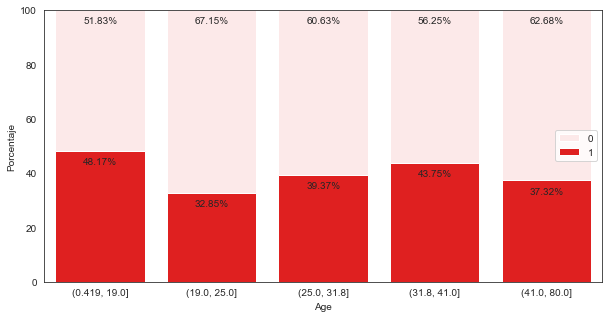

<IPython.core.display.Javascript object>

In [46]:
def grafica_barras_apiladas(
    variable_analizada, target, variable_creada, partición, colores
):
    x, y, z, q, colores = (
        variable_analizada,
        target,
        variable_creada,
        partición,
        colores,
    )
    plt.figure(figsize=(10, 5))
    data = pd.DataFrame(train[x], train[y]).reset_index()
    data[z] = pd.qcut(train[x], q)
    data1 = data.groupby(z)[y].value_counts(normalize=True) * 100
    data1 = data1.rename("Porcentaje").reset_index()
    data1.loc[data1[y] == 0, "Porcentaje"] = 100
    g = sns.barplot(x=z, y="Porcentaje", dodge=False, hue=y, data=data1, color=colores,)
    g.set_ylim(0, 100)

    lista = list(data1.loc[data1[y] == 1, "Porcentaje"])
    i = 0
    for p in g.patches:
        if i < len(lista):
            txt = str(round(p.get_height() - lista[i], 2)) + "%"
        else:
            txt = str(p.get_height().round(2)) + "%"

        txt_y = p.get_height()
        txt_x = p.get_x()
        g.text(txt_x + 0.25, txt_y - 5, txt)
        i += 1

    g.legend(loc=5)


grafica_barras_apiladas("Age", "Survived", "Age", 5, "red")

Podemos notar que las personas de 20 a 25 aprox son las que menos sobrevivencia han tenido, mientras que los menores de 20 son los que más han sobrevivido, es mejor crear bandas por edad para el modelo

In [47]:
titanic["BandAge"] = 0
titanic.loc[(titanic["Age"] > 19) & (titanic["Age"] <= 25), "BandAge"] = 1
titanic.loc[(titanic["Age"] > 25) & (titanic["Age"] <= 31.8), "BandAge"] = 2
titanic.loc[(titanic["Age"] > 31.8) & (titanic["Age"] <= 41), "BandAge"] = 3
titanic.loc[titanic["Age"] > 41, "BandAge"] = 4

<IPython.core.display.Javascript object>

Ahora veamos la que ocurre con **Fare**

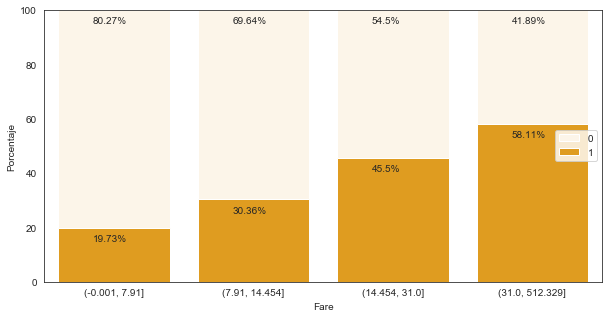

<IPython.core.display.Javascript object>

In [48]:
grafica_barras_apiladas("Fare", "Survived", "Fare", 4, "orange")

Notamos que la relación de sobrevivencia es creciente, y que mientras más aumenta la tarifa, la persona sobrevive, entonces lo mejor será dividir por bandas la variable. 

In [49]:
titanic["BandFare"] = 0
titanic.loc[(titanic["Fare"] > 7.854) & (titanic["Fare"] <= 10.5), "BandFare"] = 1
titanic.loc[(titanic["Fare"] > 10.5) & (titanic["Fare"] <= 21.679), "BandFare"] = 2
titanic.loc[(titanic["Fare"] > 21.679) & (titanic["Fare"] <= 39.688), "BandFare"] = 3
titanic.loc[titanic["Fare"] > 39.688, "BandFare"] = 4

<IPython.core.display.Javascript object>

In [50]:
# Borrando las variable utilizadas
del titanic["Age"]
del titanic["Fare"]

<IPython.core.display.Javascript object>

In [51]:
titanic.loc[titanic.Sex == "male", "Sex"] = 1
titanic.loc[titanic.Sex == "female", "Sex"] = 0

<IPython.core.display.Javascript object>

Creamos dummies para **Embarked** y **Titulo**

In [52]:
dummies = pd.get_dummies(titanic[["Embarked", "Titulo"]])

<IPython.core.display.Javascript object>

In [53]:
# Juntamos los dummies creados y la información que tenemos
titanic = pd.concat((titanic, dummies), axis=1)

<IPython.core.display.Javascript object>

In [54]:
# Borramos las variables utilizadas
del titanic["Embarked"]
del titanic["Titulo"]

<IPython.core.display.Javascript object>

In [55]:
# Finalmente tenemos lo siguiente
titanic.head()

,PassengerId,Survived,Pclass,Sex,Family,numeric_ticket,BandAge,BandFare,Embarked_C,Embarked_Q,Embarked_S,Titulo_Master,Titulo_Miss,Titulo_Mr,Titulo_Mrs,Titulo_Rare
0,1,0.0,3,1,2,0,1,0,0,0,1,0,0,1,0,0
1,2,1.0,1,0,2,0,3,4,1,0,0,0,0,0,1,0
2,3,1.0,3,0,1,0,2,1,0,0,1,0,1,0,0,0
3,4,1.0,1,0,2,1,3,4,0,0,1,0,0,0,1,0
4,5,0.0,3,1,1,1,3,1,0,0,1,0,0,1,0,0


<IPython.core.display.Javascript object>

## Modelado

Utilizaremos validazión cruzada, es por ello que no necesitaremos crear particiones de prueba y entrenamiento, solo de prueba. Sin embargo crearemos un X_pred que representará las variables que nos permitiran predecir el conjunto de datos test.

In [56]:
X_train = titanic[:][:end_train].drop(["PassengerId", "Survived"], axis=1)
Y_train = titanic["Survived"][:end_train]
X_pred = titanic[:][end_train:].drop(["PassengerId", "Survived"], axis=1)

<IPython.core.display.Javascript object>

Usaremos el modelo de Random Forest

In [57]:
# Traemos los modelos que usaremos
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

<IPython.core.display.Javascript object>

Ejecutamos el modelo, lo entrenamos y vemos su score con parámetros por defecto

In [58]:
rf = RandomForestClassifier(random_state=1)
cv = cross_val_score(rf, X_train, Y_train, cv=5)
print(cv)
print(cv.mean())

[0.7877095  0.76404494 0.83707865 0.76966292 0.78089888]
0.7878789780930262


<IPython.core.display.Javascript object>

Como nos da un valor de 0.78, es mejor buscar los mejores parámetros, utilizaremos GridSearch que nos permitirá encontrar esos parámetros

In [59]:
# Importamos GridSearch
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

In [60]:
# Creamos una función que nos presente es score y sus respectivos parámetros
def clf_performance(classifier, model_name):
    print(model_name)
    print("Best Score: " + str(classifier.best_score_))
    print("Best Parameters: " + str(classifier.best_params_))

<IPython.core.display.Javascript object>

Ejecutamos el modelo probando parámetros que proporcionaremos

In [61]:
rf = RandomForestClassifier(random_state=1)
param_grid = {
    "n_estimators": [400, 450, 500, 550],
    "criterion": ["gini", "entropy"],
    "bootstrap": [True],
    "max_depth": [15, 20, 25],
    "max_features": ["auto", "sqrt", 10],
    "min_samples_leaf": [2, 3],
    "min_samples_split": [2, 3],
}

clf_rf = GridSearchCV(rf, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_rf = clf_rf.fit(X_train, Y_train)
clf_performance(best_clf_rf, "Random Forest")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  8.4min finished


Random Forest
Best Score: 0.8215868432615654
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 450}


<IPython.core.display.Javascript object>

Con los parámetros ya encontrados, revisemos cuales fueron las variables más importantes.

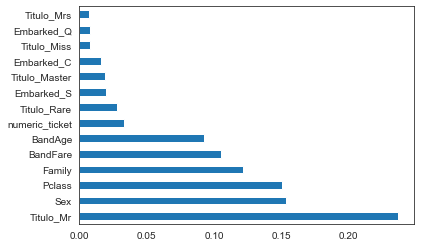

<IPython.core.display.Javascript object>

In [62]:
best_rf = best_clf_rf.best_estimator_.fit(X_train, Y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind="barh")

Ejecutemos el modelo con los parámetros hallados

In [63]:
rf = RandomForestClassifier(
    random_state=1,
    bootstrap=True,
    criterion="entropy",
    max_depth=15,
    max_features=10,
    min_samples_leaf=3,
    min_samples_split=2,
    n_estimators=450,
)
rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=10,
                       min_samples_leaf=3, n_estimators=450, random_state=1)

<IPython.core.display.Javascript object>

In [64]:
# Score del modelo con los parámetros
rf.score(X_train, Y_train)

0.8731762065095399

<IPython.core.display.Javascript object>

Es momento de predecir con este modelo, los valores de sobrevivencia del dataset test

In [66]:
Survived = rf.predict(X_pred)

<IPython.core.display.Javascript object>

Creamos un DataFrame con los valores predecidos y PassengerId

In [67]:
final = {"PassengerId": test.PassengerId, "Survived": Survived}
submission = pd.DataFrame(data=final)

<IPython.core.display.Javascript object>

Finalmente exportamos los resultados como un archivo csv

In [68]:
submission.to_csv("submission_rf.csv", index=False)

<IPython.core.display.Javascript object>